In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import csv 
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from scipy.stats import pearsonr
import statsmodels
import matplotlib.dates as mdates

### Data

##### Input data

In [2]:
file1 = "E:/NhiAri/Code/DataScience/mid_final/thai-binh-2002-2022.csv"
weather = pd.read_csv(file1)

weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,thai binh,1/31/2002,17.3,14.6,15.7,17.3,14.6,15.7,13.0,84.3,...,NaN,NaN,NaN,2002-01-31T06:31:16,2002-01-31T17:44:59,0.58,"Rain, Overcast",Cloudy skies throughout the day with late afte...,rain,"4,882,309,999,948,820,000,000"
1,thai binh,2/1/2002,14.9,11.6,12.7,14.9,11.6,12.7,11.3,91.5,...,NaN,NaN,NaN,2002-02-01T06:30:58,2002-02-01T17:45:35,0.61,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"4,882,309,999,948,820,000,000"
2,thai binh,2/2/2002,12.6,11.4,12.0,12.6,11.4,12.0,8.4,78.7,...,NaN,NaN,NaN,2002-02-02T06:30:38,2002-02-02T17:46:11,0.65,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"4,882,309,999,948,820,000,000"
3,thai binh,2/3/2002,15.3,11.5,13.3,15.3,11.5,13.3,10.9,85.9,...,NaN,NaN,NaN,2002-02-03T06:30:17,2002-02-03T17:46:47,0.68,"Rain, Overcast",Cloudy skies throughout the day with afternoon...,rain,"4,882,309,999,948,820,000,000"
4,thai binh,2/4/2002,15.5,13.5,14.2,15.5,13.5,14.2,13.8,97.7,...,NaN,NaN,NaN,2002-02-04T06:29:55,2002-02-04T17:47:22,0.75,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"4,882,309,999,948,820,000,000"


In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7640 entries, 0 to 7639
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              7640 non-null   object 
 1   datetime          7640 non-null   object 
 2   tempmax           7632 non-null   float64
 3   tempmin           7632 non-null   float64
 4   temp              7632 non-null   float64
 5   feelslikemax      7632 non-null   float64
 6   feelslikemin      7632 non-null   float64
 7   feelslike         7632 non-null   float64
 8   dew               7632 non-null   float64
 9   humidity          7632 non-null   float64
 10  precip            7632 non-null   float64
 11  precipprob        7632 non-null   float64
 12  precipcover       7640 non-null   float64
 13  preciptype        4517 non-null   object 
 14  snow              4018 non-null   float64
 15  snowdepth         4018 non-null   float64
 16  windgust          4018 non-null   float64


In [4]:
file2 = "E:/NhiAri/Code/DataScience/mid_final/ThaiBinh.csv"
crop = pd.read_csv(file2)

crop.head(5)

,Năm,Năng suất cả năm,Sản lượng cả năm,Năng suất vụ đông xuân,Sản lượng vụ đông xuân,Năng suất vụ mùa,Sản lượng vụ mùa,Unit_Năng_suất,Unit_Sản_lượng
0,2002,63.0,1081.6,67.4,574.1,58.6,507.5,Tạ/ha,Nghìn tấn
1,2003,54.6,930.7,69.2,585.8,40.2,344.9,Tạ/ha,Nghìn tấn
2,2004,63.4,1069.5,70.2,585.4,56.8,484.1,Tạ/ha,Nghìn tấn
3,2005,58.6,981.6,71.1,590.1,46.4,391.5,Tạ/ha,Nghìn tấn
4,2006,65.0,1079.6,71.1,584.1,59.1,495.5,Tạ/ha,Nghìn tấn


In [5]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Năm                     21 non-null     int64  
 1   Năng suất cả năm        21 non-null     float64
 2   Sản lượng cả năm        21 non-null     float64
 3   Năng suất vụ đông xuân  21 non-null     float64
 4   Sản lượng vụ đông xuân  21 non-null     float64
 5   Năng suất vụ mùa        21 non-null     float64
 6   Sản lượng vụ mùa        21 non-null     float64
 7   Unit_Năng_suất          21 non-null     object 
 8   Unit_Sản_lượng          21 non-null     object 
dtypes: float64(6), int64(1), object(2)
memory usage: 1.6+ KB


##### Preprocessing data

Remove the weather parameters that had minimal impact on rice yield

In [6]:
columns_to_keep = [
    'datetime',
    'tempmax', 'tempmin', 'temp',  # Temperature
    'precip', 'precipcover',       # Precipitation
    'humidity',                    # Humidity
    'solarradiation',              # Solar Radiation
    'windspeed',                   # Wind Speed
    'cloudcover'                   # Cloud Cover
]

# Drop all other columns
weather = weather[columns_to_keep]

In [7]:
weather.head()

,datetime,tempmax,tempmin,temp,precip,precipcover,humidity,solarradiation,windspeed,cloudcover
0,1/31/2002,17.3,14.6,15.7,0.076,4.17,84.3,NaN,9.7,98.9
1,2/1/2002,14.9,11.6,12.7,4.014,12.50,91.5,NaN,18.0,98.9
2,2/2/2002,12.6,11.4,12.0,0.269,8.33,78.7,NaN,10.2,97.9
3,2/3/2002,15.3,11.5,13.3,0.107,4.17,85.9,NaN,6.6,98.9
4,2/4/2002,15.5,13.5,14.2,1.277,8.33,97.7,NaN,11.4,100.0


Transform 'datetime' column format

In [8]:
weather['datetime']=pd.to_datetime(weather['datetime'])
# weather['year']=weather['datetime'].dt.year
# weather['month'] = weather['datetime'].dt.month
# weather['day'] = weather['datetime'].dt.day
# weather['day_of_year'] = weather['datetime'].dt.dayofyear


In [ ]:
weather.sort_values(by='datetime', inplace=True)

Rename columns

In [ ]:
crop.columns

Index(['Năm', 'Năng suất cả năm', 'Sản lượng cả năm', 'Năng suất vụ đông xuân',
       'Sản lượng vụ đông xuân', 'Năng suất vụ mùa', 'Sản lượng vụ mùa',
       'Unit_Năng_suất', 'Unit_Sản_lượng'],
      dtype='object')

In [ ]:
# Renaming the columns in the 'crop' DataFrame for consistency and clarity
crop.rename(columns={
    'Năm': 'Year',
    'Năng suất cả năm': 'Annual Yield',
    'Sản lượng cả năm': 'Annual Production',
    'Năng suất vụ đông xuân': 'Winter-Spring Yield',
    'Sản lượng vụ đông xuân': 'Winter-Spring Production',
    'Năng suất vụ mùa': 'Summer Yield',
    'Sản lượng vụ mùa': 'Summer Production',
    'Unit_Năng_suất': 'Yield Unit',
    'Unit_Sản_lượng': 'Production Unit'
}, inplace=True)

# Display the renamed DataFrame columns to confirm the change
crop.columns

Index(['Year', 'Annual Yield', 'Annual Production', 'Winter-Spring Yield',
       'Winter-Spring Production', 'Summer Yield', 'Summer Production',
       'Yield Unit', 'Production Unit'],
      dtype='object')

Check for missing data

In [10]:
nan_count = weather.isna().sum().sum()
nan_count

2940

In [11]:
nan_count_per_column = weather.isna().sum()
print(nan_count_per_column)

datetime             0
tempmax              8
tempmin              8
temp                 8
precip               8
precipcover          0
humidity             8
solarradiation    2892
windspeed            0
cloudcover           8
dtype: int64


In [12]:
nan_rows = weather[weather['tempmax'].isna()][['datetime', 'tempmax']]
print(nan_rows)

       datetime  tempmax
1521 2006-04-01      NaN
1591 2006-06-10      NaN
1592 2006-06-11      NaN
2475 2008-11-10      NaN
2476 2008-11-11      NaN
2725 2009-07-18      NaN
2746 2009-08-08      NaN
2747 2009-08-09      NaN


In [13]:
nan_rows = weather[weather['tempmin'].isna()][['datetime', 'tempmin']]
print(nan_rows)

       datetime  tempmin
1521 2006-04-01      NaN
1591 2006-06-10      NaN
1592 2006-06-11      NaN
2475 2008-11-10      NaN
2476 2008-11-11      NaN
2725 2009-07-18      NaN
2746 2009-08-08      NaN
2747 2009-08-09      NaN


In [14]:
nan_rows = weather[weather['precip'].isna()][['datetime', 'precip']]
print(nan_rows)

       datetime  precip
1521 2006-04-01     NaN
1591 2006-06-10     NaN
1592 2006-06-11     NaN
2475 2008-11-10     NaN
2476 2008-11-11     NaN
2725 2009-07-18     NaN
2746 2009-08-08     NaN
2747 2009-08-09     NaN


In [15]:
nan_rows = weather[weather['solarradiation'].isna()][['datetime', 'solarradiation']]
print(nan_rows)

       datetime  solarradiation
0    2002-01-31             NaN
1    2002-02-01             NaN
2    2002-02-02             NaN
3    2002-02-03             NaN
4    2002-02-04             NaN
...         ...             ...
2887 2009-12-27             NaN
2888 2009-12-28             NaN
2889 2009-12-29             NaN
2890 2009-12-30             NaN
2891 2009-12-31             NaN

[2892 rows x 2 columns]


#### Handling missing data

In [16]:
# Linear interpolation for the columns with only a few missing values
weather[['tempmax', 'tempmin', 'temp', 'precip', 'humidity', 'cloudcover']] = \
    weather[['tempmax', 'tempmin', 'temp', 'precip', 'humidity', 'cloudcover']].interpolate(method='linear')

# Calculate monthly averages for solar radiation from available data
weather['month'] = weather['datetime'].dt.month
monthly_avg_solarradiation = weather.groupby('month')['solarradiation'].transform('mean')

# Fill missing values in solarradiation column with monthly averages
weather['solarradiation'].fillna(monthly_avg_solarradiation, inplace=True)

# Drop the auxiliary 'month' column after filling missing values
weather.drop(columns='month', inplace=True)

# Check for any remaining missing values
remaining_missing_values = weather.isna().sum()

remaining_missing_values

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24088\1730502335.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather['solarradiation'].fillna(monthly_avg_solarradiation, inplace=True)


datetime          0
tempmax           0
tempmin           0
temp              0
precip            0
precipcover       0
humidity          0
solarradiation    0
windspeed         0
cloudcover        0
dtype: int64

In [17]:
nan_count_per_column = weather.isna().sum()
print(nan_count_per_column)

datetime          0
tempmax           0
tempmin           0
temp              0
precip            0
precipcover       0
humidity          0
solarradiation    0
windspeed         0
cloudcover        0
dtype: int64


In [18]:
weather.head()

,datetime,tempmax,tempmin,temp,precip,precipcover,humidity,solarradiation,windspeed,cloudcover
0,2002-01-31,17.3,14.6,15.7,0.076,4.17,84.3,123.211663,9.7,98.9
1,2002-02-01,14.9,11.6,12.7,4.014,12.50,91.5,157.695640,18.0,98.9
2,2002-02-02,12.6,11.4,12.0,0.269,8.33,78.7,157.695640,10.2,97.9
3,2002-02-03,15.3,11.5,13.3,0.107,4.17,85.9,157.695640,6.6,98.9
4,2002-02-04,15.5,13.5,14.2,1.277,8.33,97.7,157.695640,11.4,100.0


In [19]:
specific_datetime = '2010-12-28'

# Filter rows based on the specific datetime
filtered_data = weather[weather['datetime'] == specific_datetime]

# Display the result
print(filtered_data)


       datetime  tempmax  tempmin  temp  precip  precipcover  humidity  \
3253 2010-12-28     20.7     14.0  18.0     0.0          0.0      81.0   

      solarradiation  windspeed  cloudcover  
3253           134.6       13.0        55.1  


#### Adding new features

In [22]:
# Define months for each season
season1_months = [1, 2, 3, 4, 5]  # January to May
season2_months = [6, 7, 8, 9]     # June to September

# Extract month and year from datetime
weather['month'] = weather['datetime'].dt.month
weather['year'] = weather['datetime'].dt.year

# Calculate monthly averages for selected features
monthly_aggregates = weather.groupby(['year', 'month']).agg({
    'tempmax': 'mean',
    'tempmin': 'mean',
    'temp': 'mean',
    'precip': 'mean',
    'precipcover': 'mean',
    'humidity': 'mean',
    'solarradiation': 'mean',
    'windspeed': 'mean',
    'cloudcover': 'mean'
}).rename(columns={
    'tempmax': 'avg_monthly_tempmax',
    'tempmin': 'avg_monthly_tempmin',
    'temp': 'avg_monthly_temp',
    'precip': 'avg_monthly_precip',
    'precipcover': 'avg_monthly_precipcover',
    'humidity': 'avg_monthly_humidity',
    'solarradiation': 'avg_monthly_solarradiation',
    'windspeed': 'avg_monthly_windspeed',
    'cloudcover': 'avg_monthly_cloudcover'
}).reset_index()

# Calculate seasonal averages for each year
season1_aggregates = weather[weather['month'].isin(season1_months)].groupby('year').agg({
    'temp': 'mean',
    'precip': 'mean',
    'humidity': 'mean',
    'solarradiation': 'mean',
    'windspeed': 'mean'
}).rename(columns={
    'temp': 'avg_season1_temp',
    'precip': 'avg_season1_precip',
    'humidity': 'avg_season1_humidity',
    'solarradiation': 'avg_season1_solarradiation',
    'windspeed': 'avg_season1_windspeed'
}).reset_index()

season2_aggregates = weather[weather['month'].isin(season2_months)].groupby('year').agg({
    'temp': 'mean',
    'precip': 'mean',
    'humidity': 'mean',
    'solarradiation': 'mean',
    'windspeed': 'mean'
}).rename(columns={
    'temp': 'avg_season2_temp',
    'precip': 'avg_season2_precip',
    'humidity': 'avg_season2_humidity',
    'solarradiation': 'avg_season2_solarradiation',
    'windspeed': 'avg_season2_windspeed'
}).reset_index()

# Merge monthly and seasonal averages into a single dataframe with 'year' as the index
# First, aggregate monthly averages by year
yearly_monthly_aggregates = monthly_aggregates.groupby('year').mean().reset_index()

# Merge with seasonal aggregates
final_aggregates = yearly_monthly_aggregates.merge(season1_aggregates, on='year', how='left')
final_aggregates = final_aggregates.merge(season2_aggregates, on='year', how='left')

# Display the final DataFrame
final_aggregates.drop(columns=['month'], inplace=True)

In [23]:
final_aggregates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        21 non-null     int32  
 1   avg_monthly_tempmax         21 non-null     float64
 2   avg_monthly_tempmin         21 non-null     float64
 3   avg_monthly_temp            21 non-null     float64
 4   avg_monthly_precip          21 non-null     float64
 5   avg_monthly_precipcover     21 non-null     float64
 6   avg_monthly_humidity        21 non-null     float64
 7   avg_monthly_solarradiation  21 non-null     float64
 8   avg_monthly_windspeed       21 non-null     float64
 9   avg_monthly_cloudcover      21 non-null     float64
 10  avg_season1_temp            21 non-null     float64
 11  avg_season1_precip          21 non-null     float64
 12  avg_season1_humidity        21 non-null     float64
 13  avg_season1_solarradiation  21 non-nu

In [24]:
final_aggregates.head()

,year,avg_monthly_tempmax,avg_monthly_tempmin,avg_monthly_temp,avg_monthly_precip,avg_monthly_precipcover,avg_monthly_humidity,avg_monthly_solarradiation,avg_monthly_windspeed,avg_monthly_cloudcover,avg_season1_temp,avg_season1_precip,avg_season1_humidity,avg_season1_solarradiation,avg_season1_windspeed,avg_season2_temp,avg_season2_precip,avg_season2_humidity,avg_season2_solarradiation,avg_season2_windspeed
0,2002,26.678260,21.862256,23.954776,3.483915,4.699872,85.919877,173.072855,13.119687,80.751068,23.316529,3.721917,87.773554,186.150073,14.132231,28.518033,4.311656,84.156557,186.696532,13.436885
1,2003,27.915268,22.323206,24.761690,4.066104,2.584268,82.851326,173.072855,12.766911,69.401840,22.597351,2.081351,86.036424,173.645753,13.206623,29.084426,9.357041,83.665574,186.696532,13.150820
2,2004,26.865018,21.462337,23.851234,3.668133,3.155767,82.871540,173.072855,10.940932,73.150510,21.118421,2.146618,85.513158,173.540818,11.184868,28.539344,7.815648,83.354098,186.696532,10.554098
3,2005,26.569959,21.773237,23.903875,4.242288,3.641393,83.119110,173.072855,12.032762,77.078193,21.136424,1.172960,85.746358,173.645753,11.255629,29.045082,9.068959,82.284426,186.696532,13.572951
4,2006,27.303977,22.195735,24.436980,3.923293,2.933207,82.243472,173.072855,11.818308,74.227319,21.677815,2.841424,84.891060,173.645753,11.750331,28.804098,6.941156,81.150820,186.696532,12.290984


In [25]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7640 entries, 0 to 7639
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        7640 non-null   datetime64[ns]
 1   tempmax         7640 non-null   float64       
 2   tempmin         7640 non-null   float64       
 3   temp            7640 non-null   float64       
 4   precip          7640 non-null   float64       
 5   precipcover     7640 non-null   float64       
 6   humidity        7640 non-null   float64       
 7   solarradiation  7640 non-null   float64       
 8   windspeed       7640 non-null   float64       
 9   cloudcover      7640 non-null   float64       
 10  month           7640 non-null   int32         
 11  year            7640 non-null   int32         
dtypes: datetime64[ns](1), float64(9), int32(2)
memory usage: 656.7 KB


In [26]:
weather.head()

,datetime,tempmax,tempmin,temp,precip,precipcover,humidity,solarradiation,windspeed,cloudcover,month,year
0,2002-01-31,17.3,14.6,15.7,0.076,4.17,84.3,123.211663,9.7,98.9,1,2002
1,2002-02-01,14.9,11.6,12.7,4.014,12.50,91.5,157.695640,18.0,98.9,2,2002
2,2002-02-02,12.6,11.4,12.0,0.269,8.33,78.7,157.695640,10.2,97.9,2,2002
3,2002-02-03,15.3,11.5,13.3,0.107,4.17,85.9,157.695640,6.6,98.9,2,2002
4,2002-02-04,15.5,13.5,14.2,1.277,8.33,97.7,157.695640,11.4,100.0,2,2002


In [27]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      21 non-null     int64  
 1   Annual Yield              21 non-null     float64
 2   Annual Production         21 non-null     float64
 3   Winter-Spring Yield       21 non-null     float64
 4   Winter-Spring Production  21 non-null     float64
 5   Summer Yield              21 non-null     float64
 6   Summer Production         21 non-null     float64
 7   Yield Unit                21 non-null     object 
 8   Production Unit           21 non-null     object 
dtypes: float64(6), int64(1), object(2)
memory usage: 1.6+ KB


### Plot

#### Basic visualize

Single Line plot and Correlation

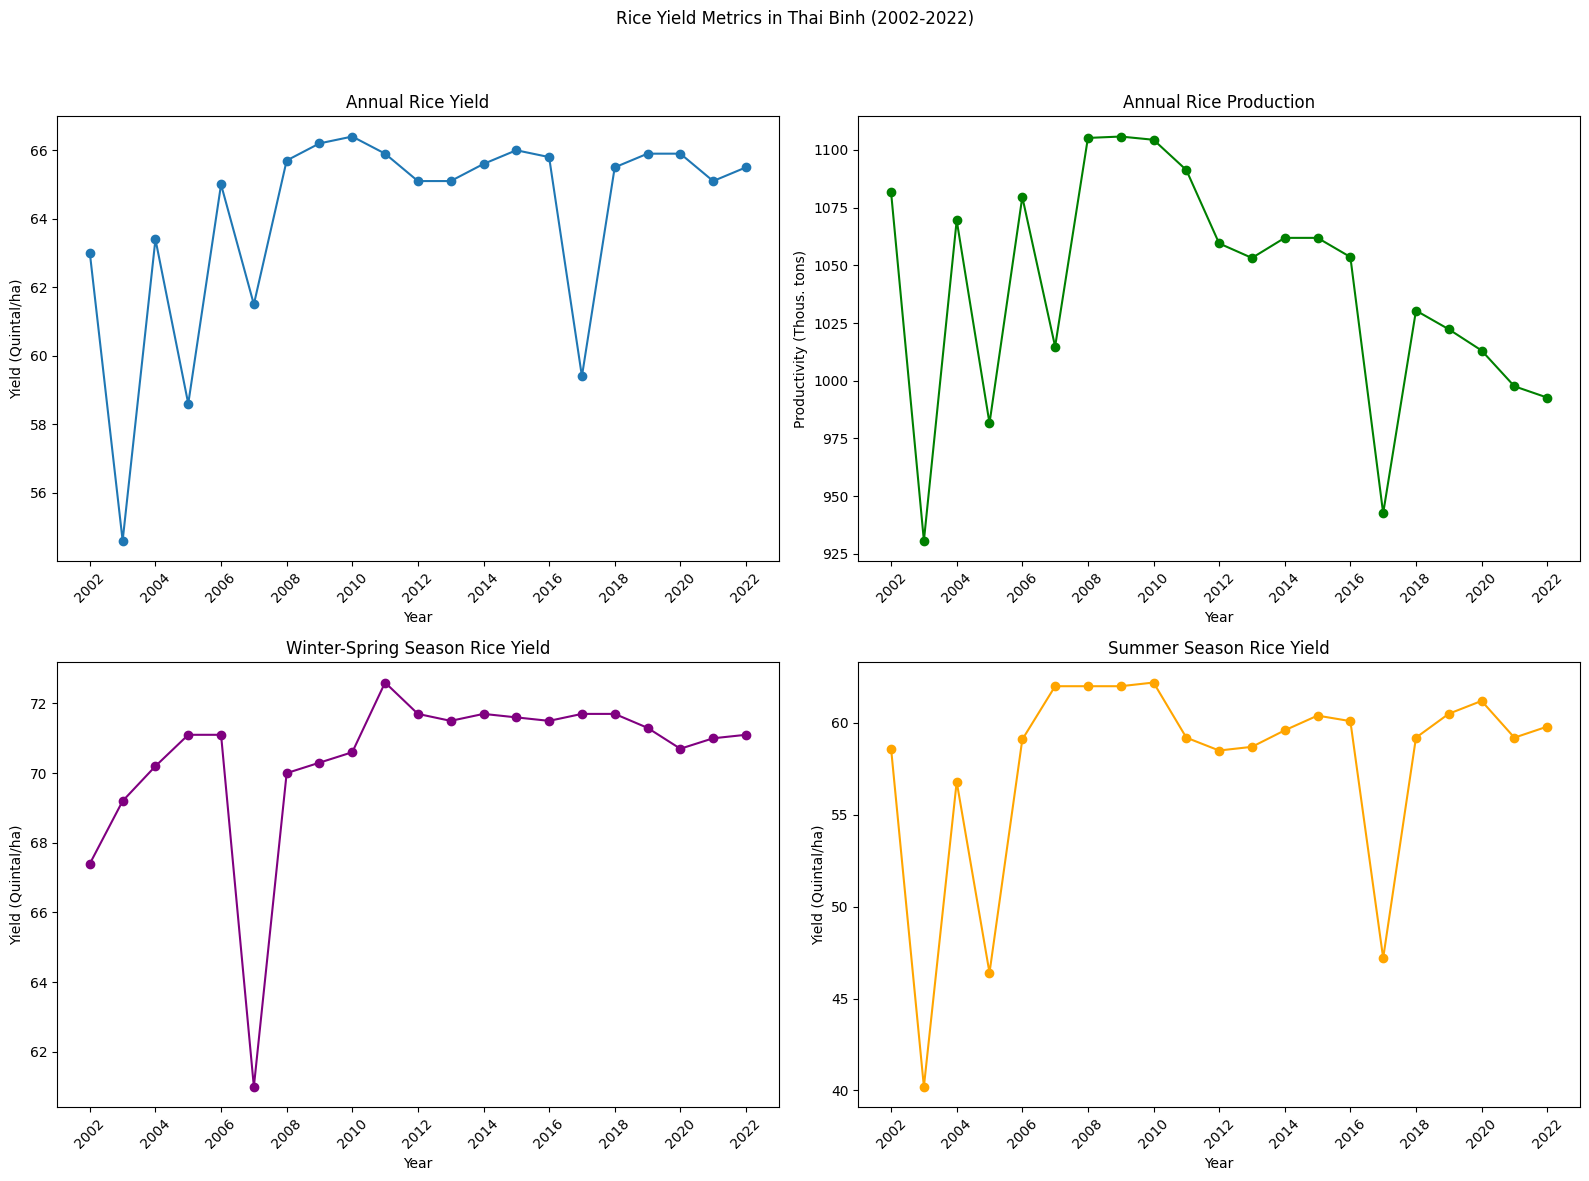

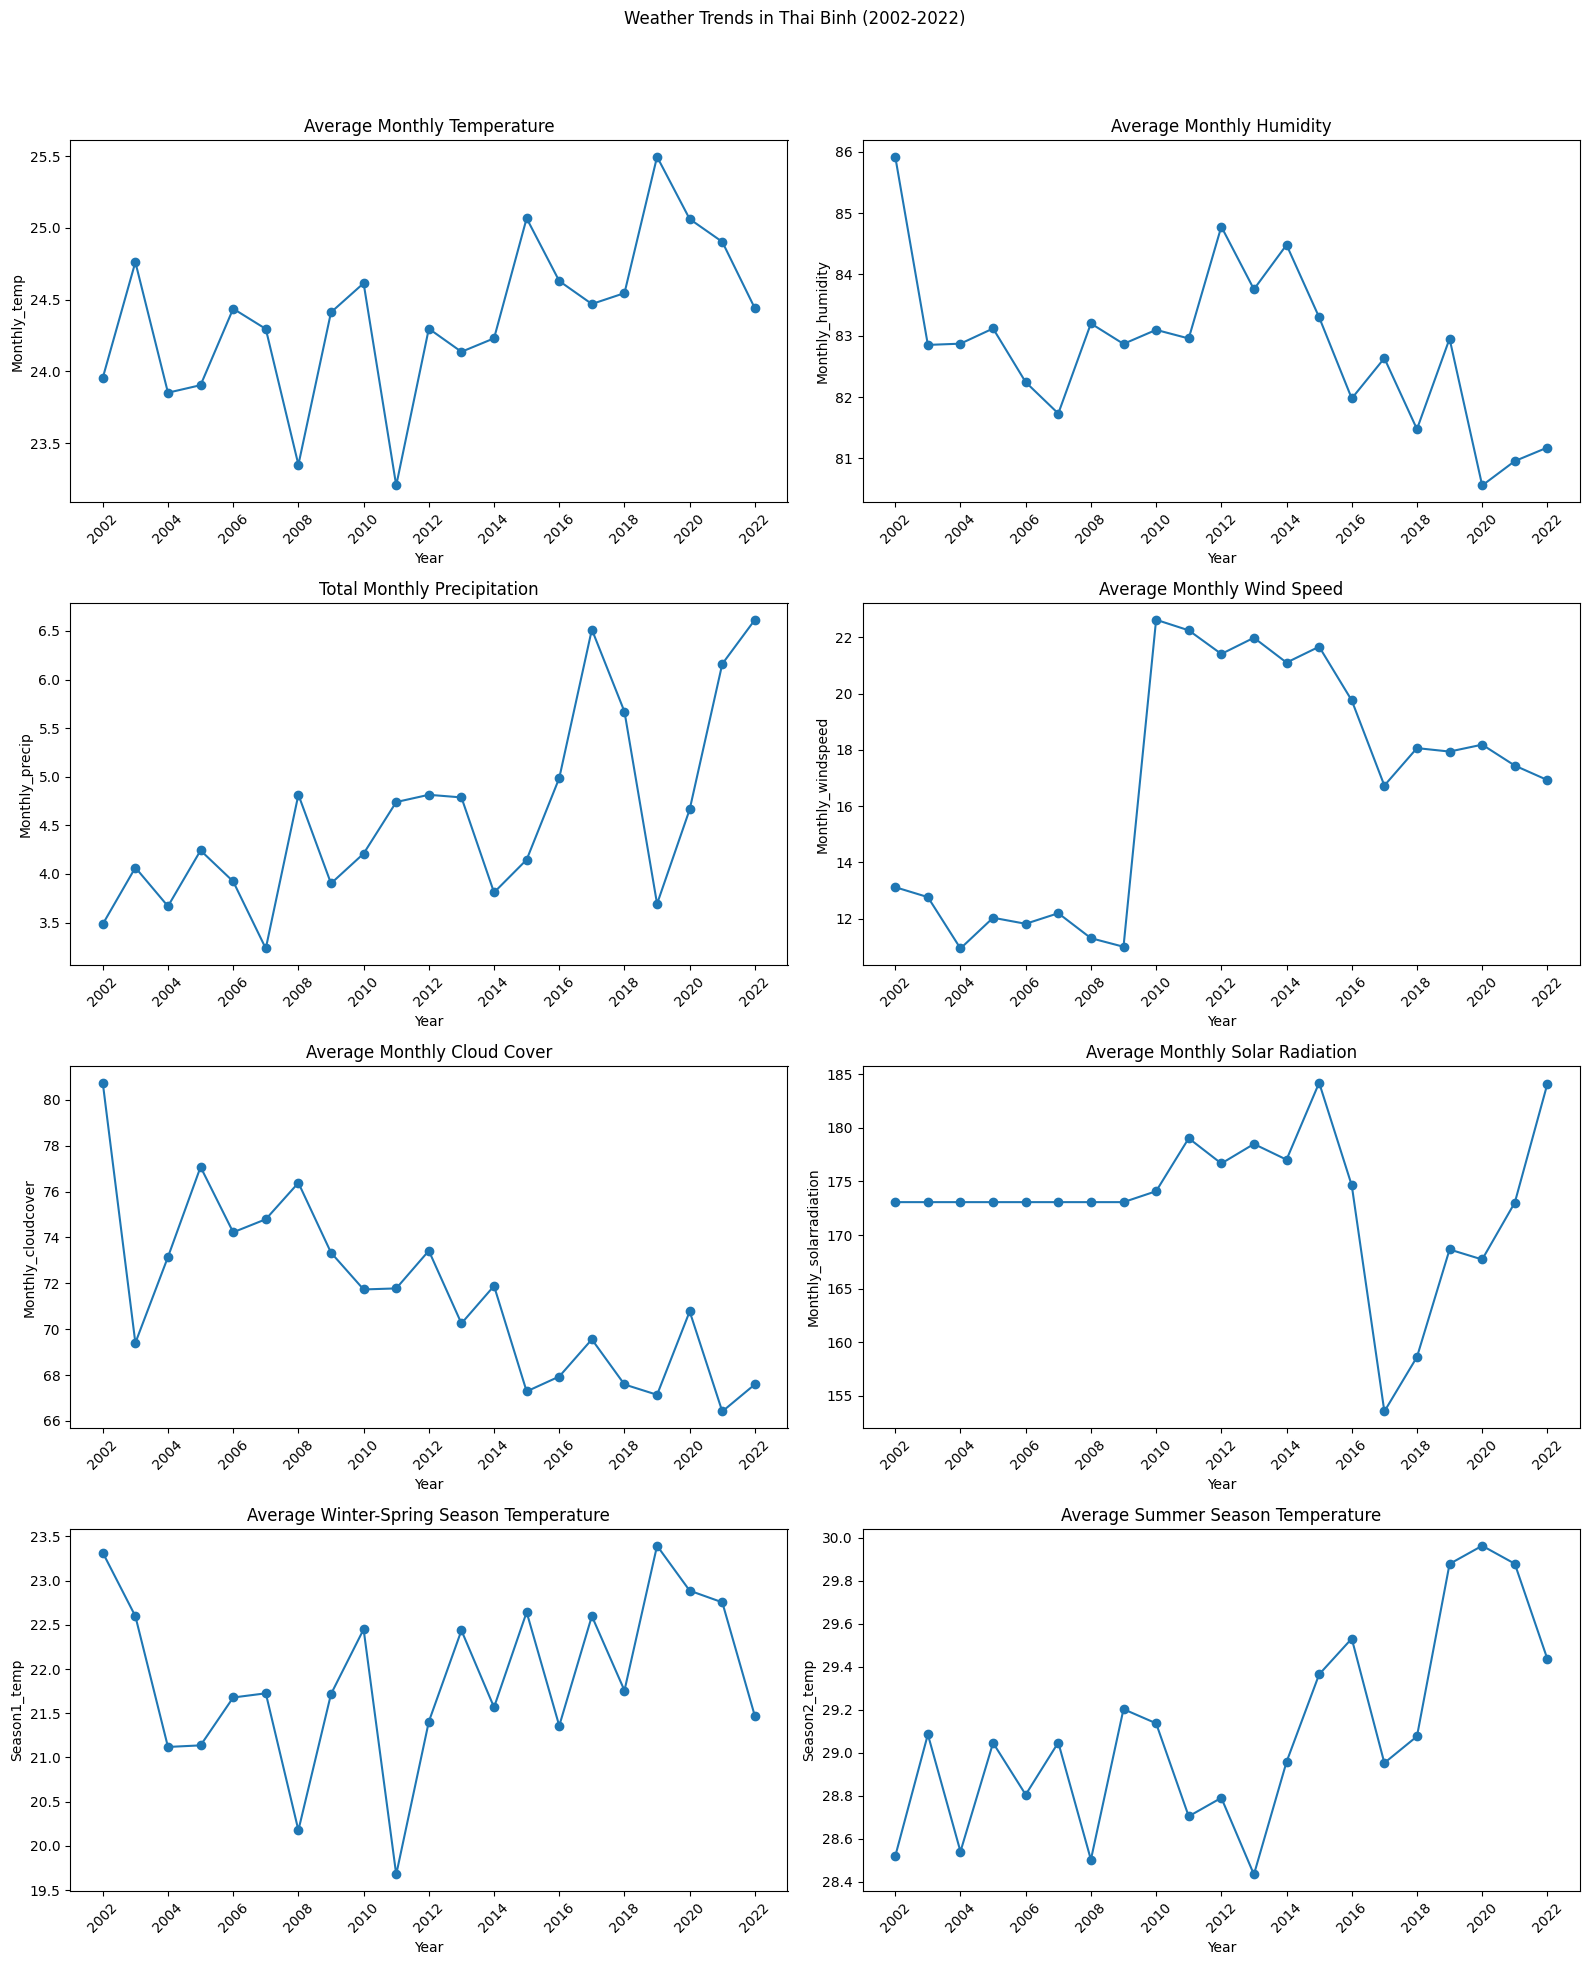

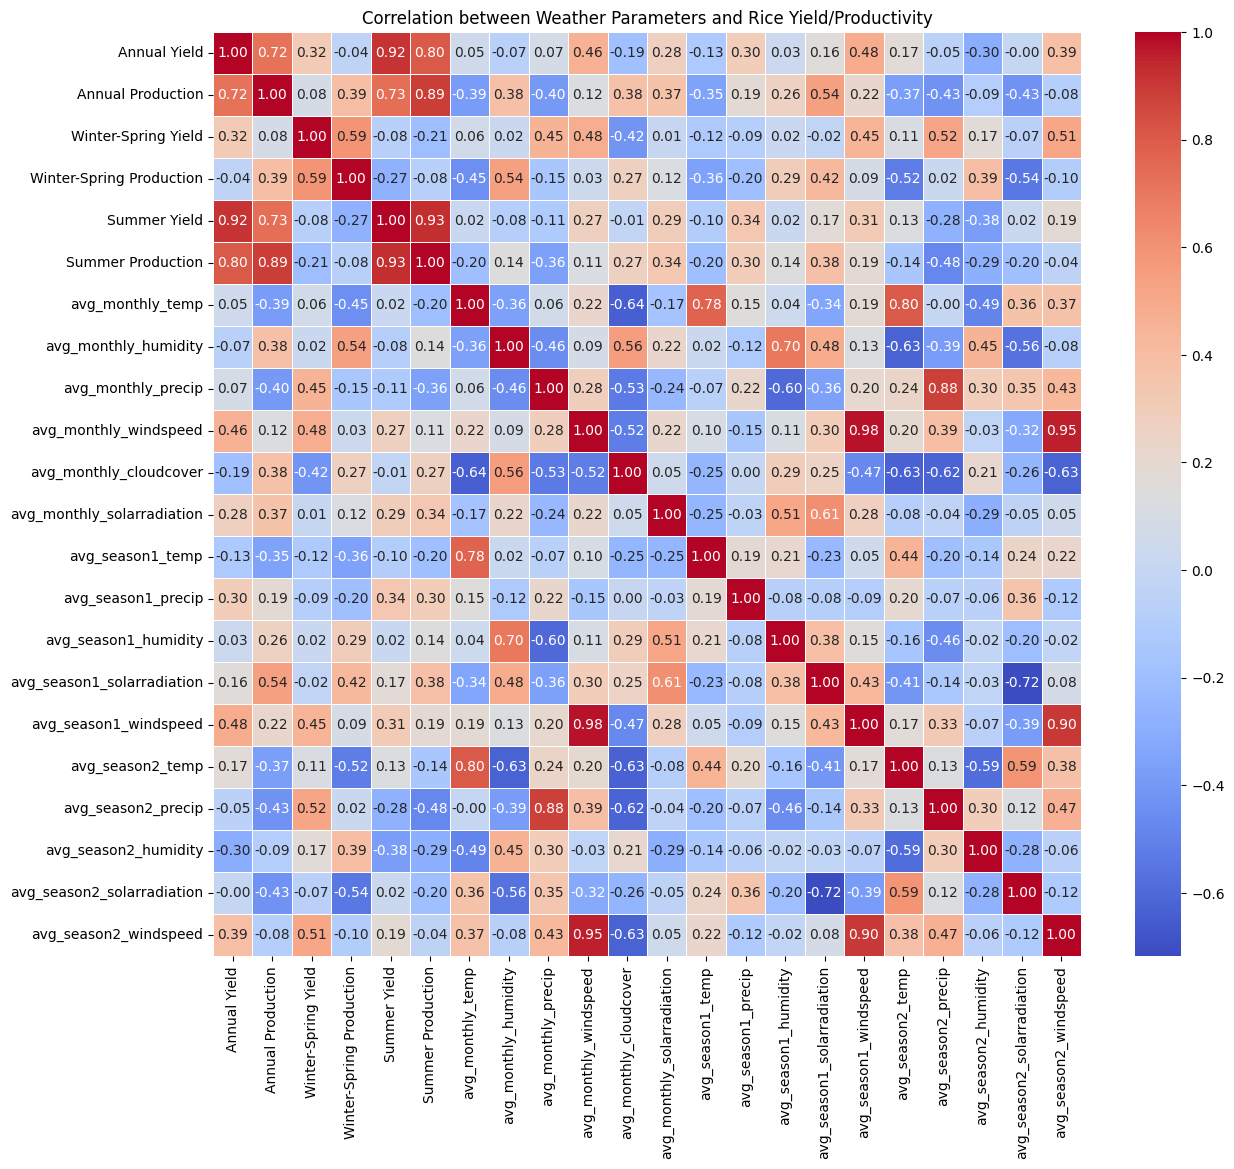

In [112]:
# Hợp nhất với dữ liệu năng suất lúa 'crop' theo cột 'Year' để so sánh và phân tích tương quan.
merged_df = pd.merge(crop, final_aggregates, left_on='Year', right_on='year', how='inner')

# Plotting rice yield metrics over time
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Rice Yield Metrics in Thai Binh (2002-2022)")

# Annual yield and productivity
axs[0, 0].plot(crop['Year'], crop['Annual Yield'], marker='o')
axs[0, 0].set_title("Annual Rice Yield")
axs[0, 0].set_xlabel("Year")
axs[0, 0].set_ylabel("Yield (Quintal/ha)")
axs[0, 0].set_xticks(crop['Year'][::2])  # Hiển thị mỗi 2 năm
axs[0, 0].tick_params(axis='x', rotation=45)  # Xoay nhãn năm

axs[0, 1].plot(crop['Year'], crop['Annual Production'], marker='o', color='green')
axs[0, 1].set_title("Annual Rice Production")
axs[0, 1].set_xlabel("Year")
axs[0, 1].set_ylabel("Productivity (Thous. tons)")
axs[0, 1].set_xticks(crop['Year'][::2])  # Hiển thị mỗi 2 năm
axs[0, 1].tick_params(axis='x', rotation=45)

# Seasonal yield and productivity
axs[1, 0].plot(crop['Year'], crop['Winter-Spring Yield'], marker='o', color='purple')
axs[1, 0].set_title("Winter-Spring Season Rice Yield")
axs[1, 0].set_xlabel("Year")
axs[1, 0].set_ylabel("Yield (Quintal/ha)")
axs[1, 0].set_xticks(crop['Year'][::2])  # Hiển thị mỗi 2 năm
axs[1, 0].tick_params(axis='x', rotation=45)

axs[1, 1].plot(crop['Year'], crop['Summer Yield'], marker='o', color='orange')
axs[1, 1].set_title("Summer Season Rice Yield")
axs[1, 1].set_xlabel("Year")
axs[1, 1].set_ylabel("Yield (Quintal/ha)")
axs[1, 1].set_xticks(crop['Year'][::2])  # Hiển thị mỗi 2 năm
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('rice_yield_metrics.svg', format='svg') 
plt.savefig('rice_yield_metrics.png', format='png') 

# Visualize yearly trends of weather parameters
fig, axs = plt.subplots(4, 2, figsize=(16, 20))
fig.suptitle("Weather Trends in Thai Binh (2002-2022)")

# Define the features and their titles
weather_features = [
    'avg_monthly_temp', 'avg_monthly_humidity', 'avg_monthly_precip', 'avg_monthly_windspeed', 
    'avg_monthly_cloudcover', 'avg_monthly_solarradiation', 'avg_season1_temp', 'avg_season2_temp'
]
titles = [
    "Average Monthly Temperature", "Average Monthly Humidity", "Total Monthly Precipitation", "Average Monthly Wind Speed", 
    "Average Monthly Cloud Cover", "Average Monthly Solar Radiation", "Average Winter-Spring Season Temperature", "Average Summer Season Temperature"
]

# Plot each feature
for i, feature in enumerate(weather_features):
    row, col = divmod(i, 2)
    axs[row, col].plot(final_aggregates['year'], final_aggregates[feature], marker='o')
    axs[row, col].set_title(titles[i])
    axs[row, col].set_xlabel("Year")
    axs[row, col].set_ylabel(feature.replace('avg_', '').capitalize())

    axs[row, col].set_xticks(final_aggregates['year'][::2])  # Set the ticks to be only the years available in data
    axs[row, col].tick_params(axis='x', rotation=45)  # Set the x-axis limits

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('weather_trends.svg', format='svg') 
plt.savefig('weather_trends.png', format='png') 

# Correlation heatmap between selected weather features and rice productivity/yield metrics
correlation_columns = [
    'Annual Yield', 'Annual Production', 'Winter-Spring Yield', 'Winter-Spring Production', 'Summer Yield', 'Summer Production',
    'avg_monthly_temp', 'avg_monthly_humidity', 'avg_monthly_precip', 'avg_monthly_windspeed', 'avg_monthly_cloudcover', 
    'avg_monthly_solarradiation', 'avg_season1_temp', 'avg_season1_precip', 'avg_season1_humidity', 
    'avg_season1_solarradiation', 'avg_season1_windspeed', 'avg_season2_temp', 'avg_season2_precip', 
    'avg_season2_humidity', 'avg_season2_solarradiation', 'avg_season2_windspeed'
]

# Calculate correlation matrix
corr_matrix = merged_df[correlation_columns].corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation between Weather Parameters and Rice Yield/Productivity")
plt.savefig('correlation_heatmap.svg', format='svg', bbox_inches='tight')
plt.savefig('correlation_heatmap.png', format='png', bbox_inches='tight')
plt.show()



Scatter plot

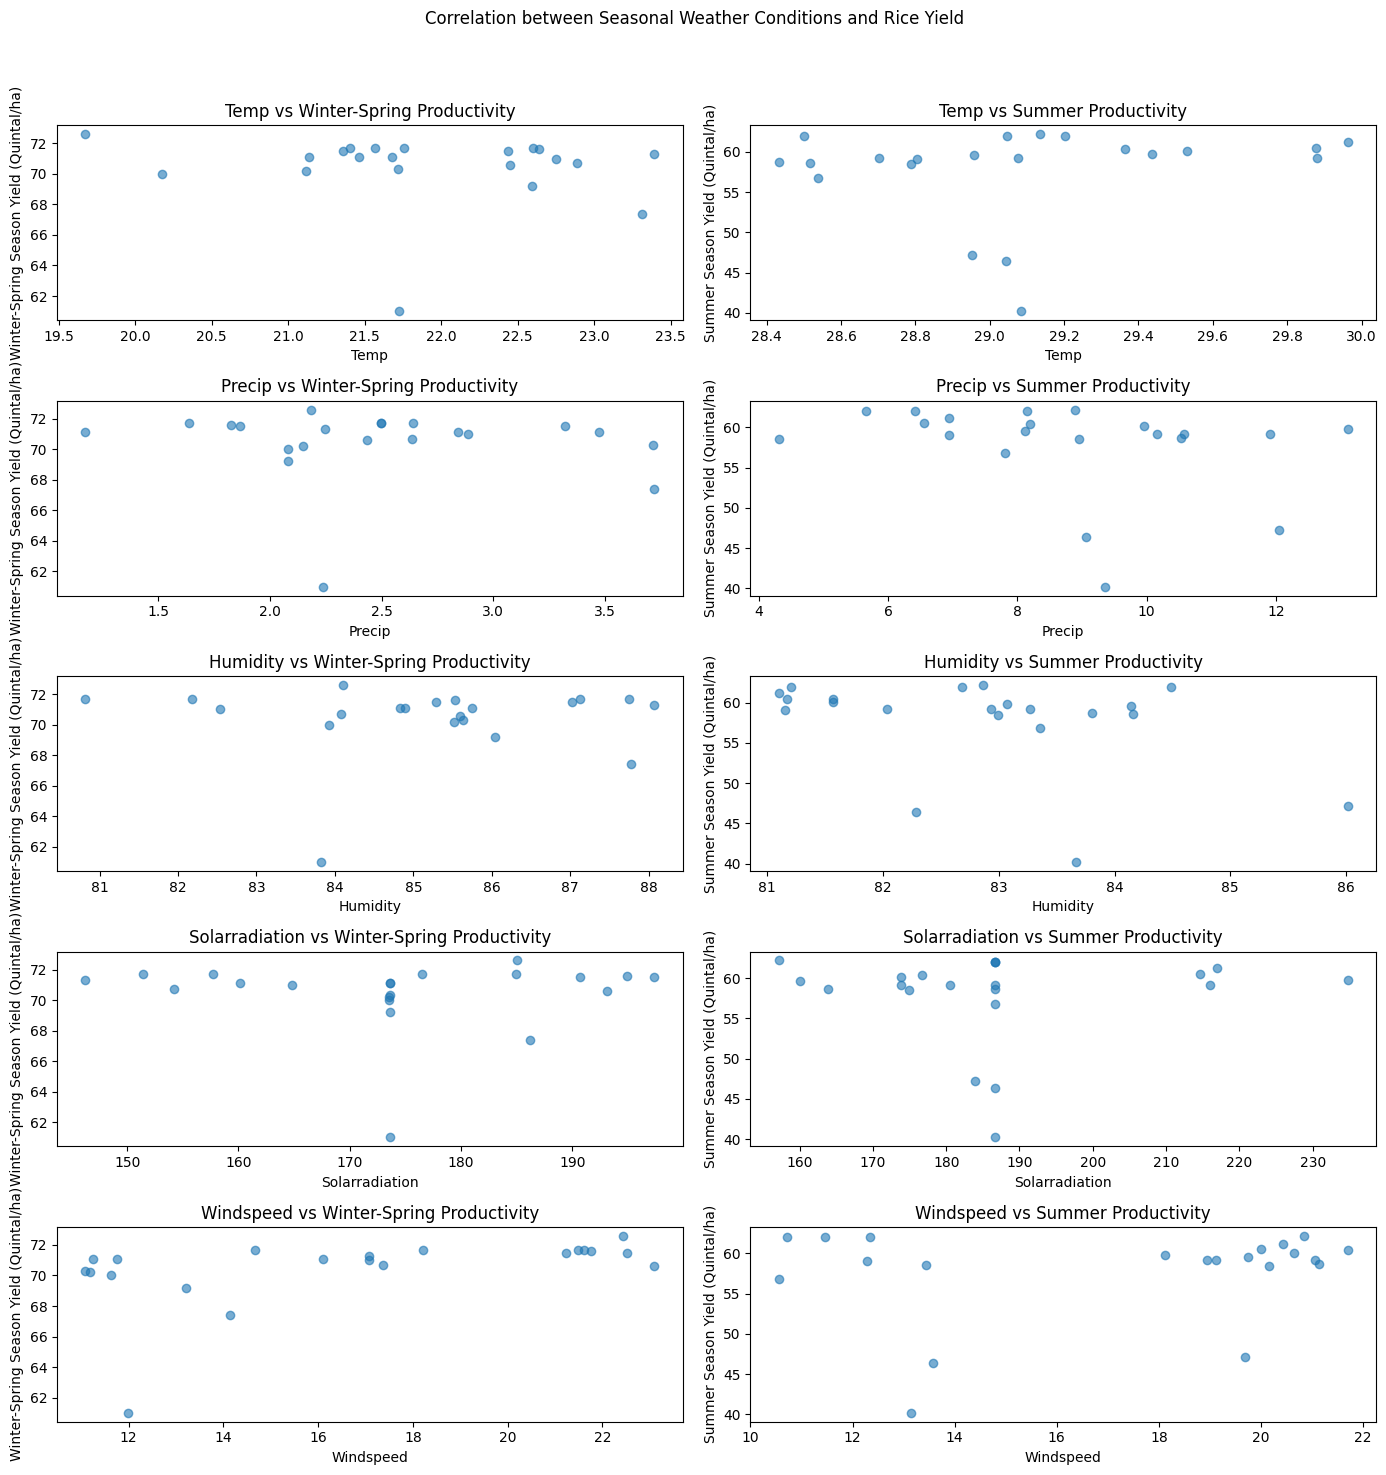

In [113]:
# Merge the crop and final_aggregates datasets
data = pd.merge(crop, final_aggregates, left_on='Year', right_on='year')

# Define the seasonal weather and productivity columns
season1_features = ['avg_season1_temp', 'avg_season1_precip', 'avg_season1_humidity', 'avg_season1_solarradiation', 'avg_season1_windspeed']
season2_features = ['avg_season2_temp', 'avg_season2_precip', 'avg_season2_humidity', 'avg_season2_solarradiation', 'avg_season2_windspeed']

# Set up subplots for each feature against seasonal productivity
fig, axs = plt.subplots(len(season1_features), 2, figsize=(14, len(season1_features) * 3))
fig.suptitle("Correlation between Seasonal Weather Conditions and Rice Yield")

# Iterate over each feature for Winter-Spring and Summer seasons
for i, (feature1, feature2) in enumerate(zip(season1_features, season2_features)):
    # Winter-Spring season plot (Jan-May weather conditions vs Winter-Spring productivity)
    axs[i, 0].scatter(data[feature1], data['Winter-Spring Yield'], alpha=0.6)
    axs[i, 0].set_xlabel(feature1.replace('avg_season1_', '').capitalize())
    axs[i, 0].set_ylabel("Winter-Spring Season Yield (Quintal/ha)")
    axs[i, 0].set_title(f"{feature1.replace('avg_season1_', '').capitalize()} vs Winter-Spring Productivity")

    # Summer season plot (May-Sep weather conditions vs Summer productivity)
    axs[i, 1].scatter(data[feature2], data['Summer Yield'], alpha=0.6)
    axs[i, 1].set_xlabel(feature2.replace('avg_season2_', '').capitalize())
    axs[i, 1].set_ylabel("Summer Season Yield (Quintal/ha)")
    axs[i, 1].set_title(f"{feature2.replace('avg_season2_', '').capitalize()} vs Summer Productivity")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("scatter_plot.svg", format='svg')
plt.savefig("scatter_plot.png", format='png')
plt.show()

Comparative Line plot

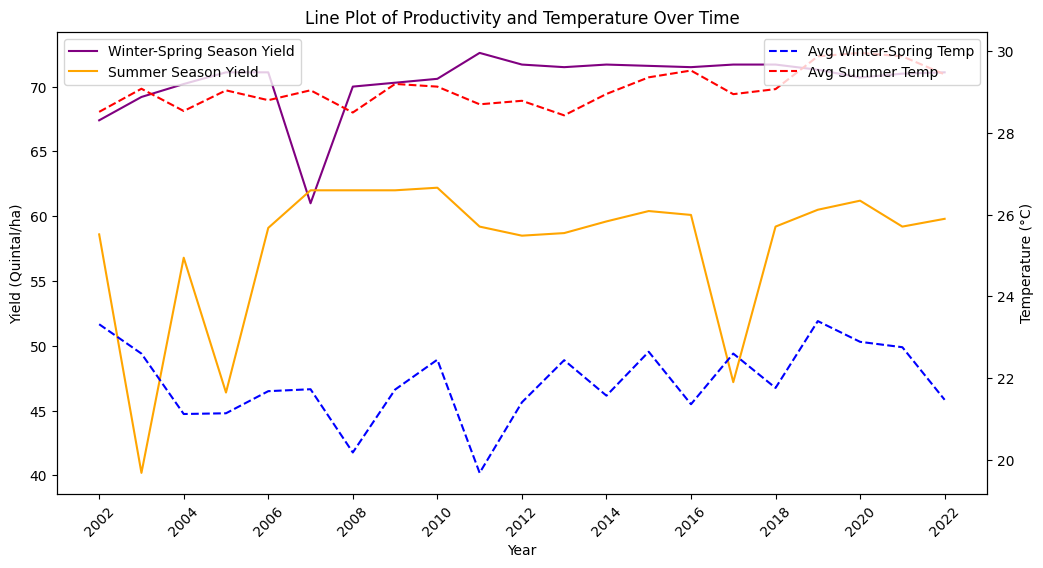

In [114]:
# Line plot for weather features and productivity over years
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average seasonal productivity
ax1.plot(crop['Year'], crop['Winter-Spring Yield'], color='purple', label="Winter-Spring Season Yield")
ax1.plot(crop['Year'], crop['Summer Yield'], color='orange', label="Summer Season Yield")
ax1.set_xlabel("Year")
ax1.set_xticks(crop['Year'][::2])  # Hiển thị mỗi 2 năm
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel("Yield (Quintal/ha)")
ax1.legend(loc="upper left")

# Adding temperature for both seasons from final_aggregates
ax2 = ax1.twinx()
ax2.plot(final_aggregates['year'], final_aggregates['avg_season1_temp'], color='blue', linestyle='--', label="Avg Winter-Spring Temp")
ax2.plot(final_aggregates['year'], final_aggregates['avg_season2_temp'], color='red', linestyle='--', label="Avg Summer Temp")
ax2.set_ylabel("Temperature (°C)")
ax2.legend(loc="upper right")

plt.title("Line Plot of Productivity and Temperature Over Time")
plt.savefig("line_plot.svg", format='svg')
plt.savefig("line_plot.png", format='png')
plt.show()

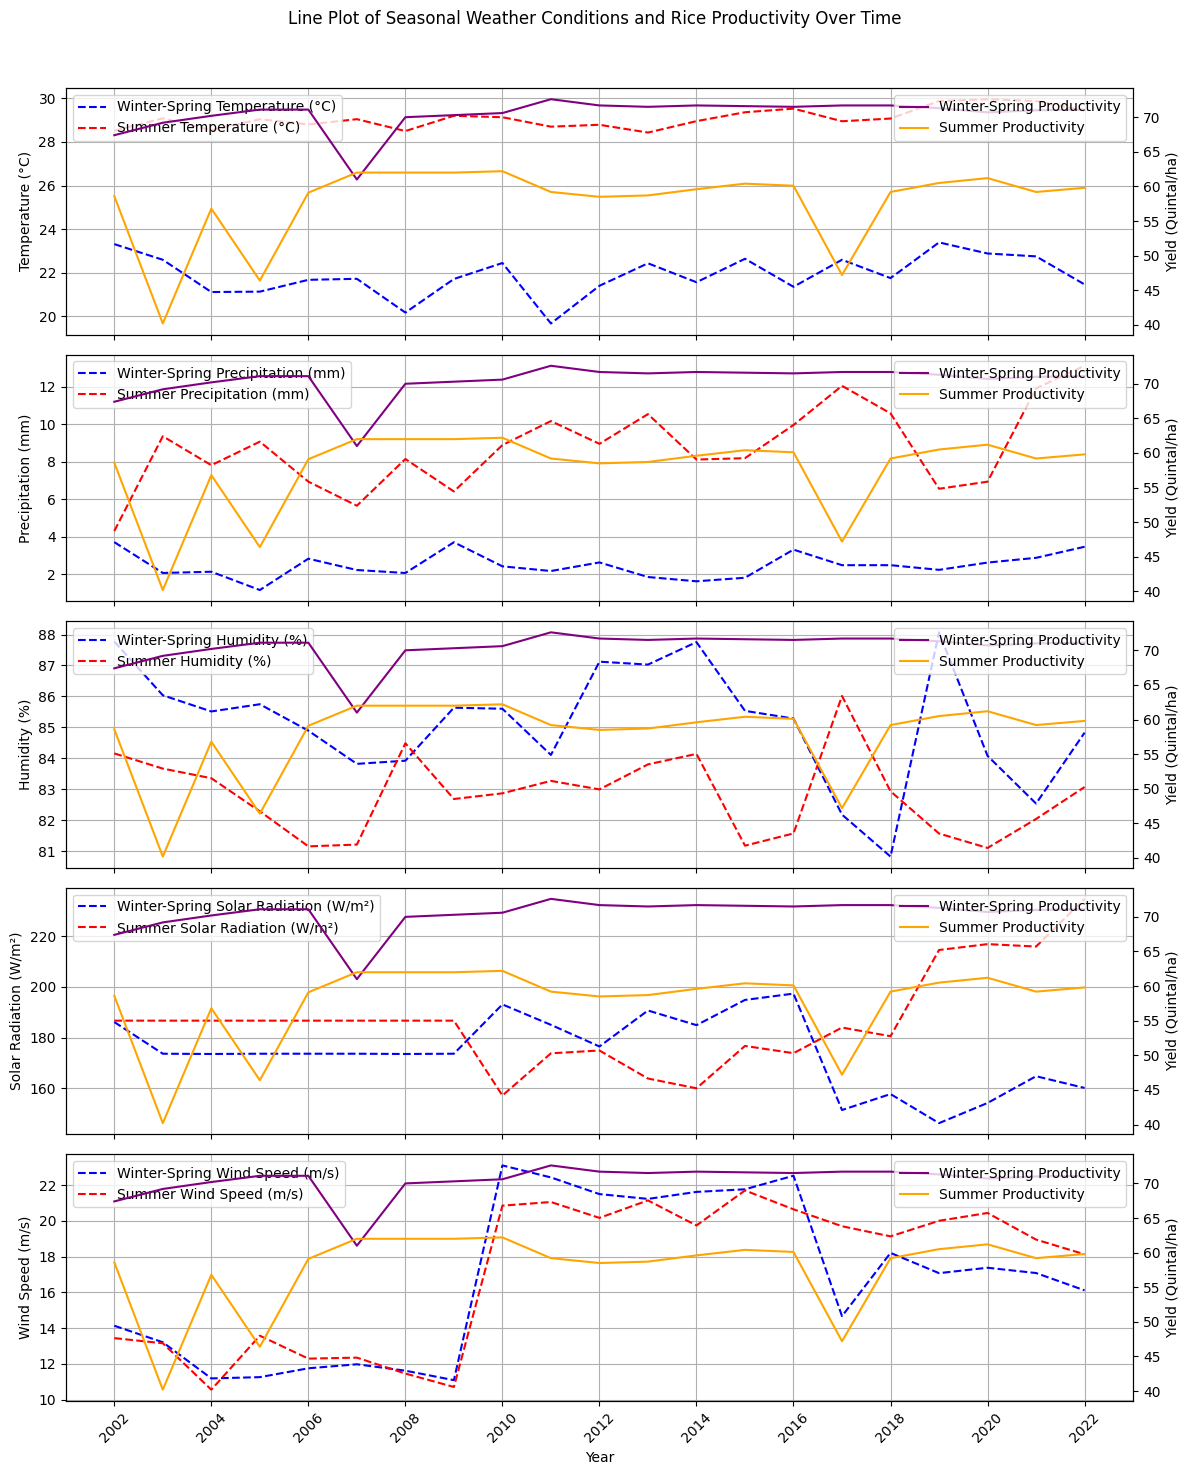

In [29]:
# Define weather features for both seasons and labels
season1_features = ['avg_season1_temp', 'avg_season1_precip', 'avg_season1_humidity', 'avg_season1_solarradiation', 'avg_season1_windspeed']
season2_features = ['avg_season2_temp', 'avg_season2_precip', 'avg_season2_humidity', 'avg_season2_solarradiation', 'avg_season2_windspeed']
feature_labels = ['Temperature (°C)', 'Precipitation (mm)', 'Humidity (%)', 'Solar Radiation (W/m²)', 'Wind Speed (m/s)']

# Set up the figure and axes
fig, axs = plt.subplots(len(season1_features), 1, figsize=(12, len(season1_features) * 3), sharex=True)
fig.suptitle("Line Plot of Seasonal Weather Conditions and Rice Productivity Over Time")

# Plot each weather feature for both seasons and add productivity on secondary y-axis
for i, (feature1, feature2, label) in enumerate(zip(season1_features, season2_features, feature_labels)):
    # Plot seasonal weather features
    axs[i].plot(final_aggregates['year'], final_aggregates[feature1], color='blue', linestyle='--', label=f"Winter-Spring {label}")
    axs[i].plot(final_aggregates['year'], final_aggregates[feature2], color='red', linestyle='--', label=f"Summer {label}")
    axs[i].set_ylabel(label)
    axs[i].legend(loc="upper left")
    axs[i].grid(True)
    
    # Plot productivity on the secondary y-axis
    ax2 = axs[i].twinx()
    ax2.plot(crop['Year'], crop['Winter-Spring Yield'], color='purple', label="Winter-Spring Productivity")
    ax2.plot(crop['Year'], crop['Summer Yield'], color='orange', label="Summer Productivity")
    ax2.set_ylabel("Yield (Quintal/ha)")
    ax2.legend(loc="upper right")

# Set shared x-axis label
axs[-1].set_xlabel("Year")
axs[-1].set_xticks(crop['Year'][::2])  # Hiển thị mỗi 2 năm
axs[-1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("seasonal_weather_productivity_trends.png", format='png')
plt.savefig("seasonal_weather_productivity_trends.svg", format='svg')
plt.show()
